In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Task 1 (интерполяционный полином Лагранжа)

In [2]:
a=5 #границы отрезка

In [3]:
def f(x):
    return (x**2 + 4*np.sin(x) - 2)

In [4]:
#подсчет коэффициентов полинома Лагранжа
def l_k(x, k, X):
    l=1
    for i in range(len(X)):
        if i!=k:
            l*=(x-X[i])/(X[k]-X[i])
    return l

In [5]:
# полином Лагранжа. Х-узлы
def L1(x,X): 
    L=0
    for i in range(len(X)):
        L+=l_k(x,i,X)*f(X[i])
    return L       

In [6]:
# поиск корней полинома Чебышева
def Ch(n,a):
    X=[]
    for i in range(n):
        X.append(a*np.cos((2*i+1)/(2*n)*np.pi))
    return X

In [7]:
n=6 #колво узлов
x=np.linspace(-a,a,num=200)
X=np.linspace(-a,a, num=n)
X_Ch=Ch(n,a)

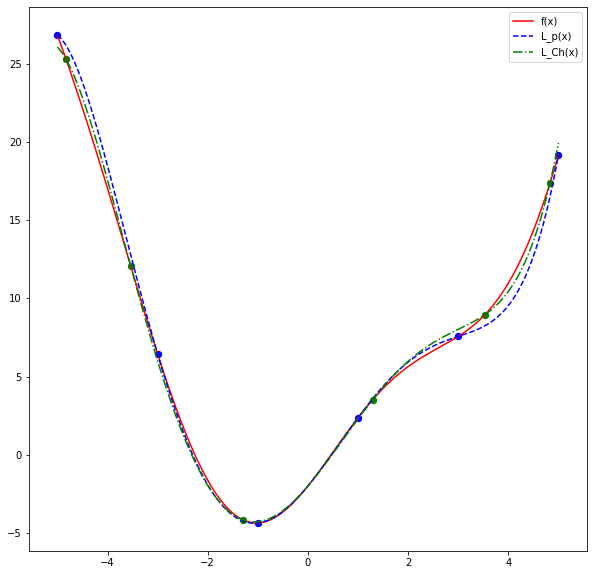

In [8]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, [f(_) for _ in x],'r-', label = 'f(x)')
plt.plot(x, L1(x,X), 'b--', label = 'L_p(x)')
plt.plot(x, L1(x,X_Ch), 'g-.', label='L_Ch(x)')
plt.scatter(X, L1(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, L1(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

In [9]:
# подсчет погрешности
def E1(x,X):
    max=0
    for i in x:
        diff=abs(f(i)-L1(i,X))
        if diff>max:
            max=diff
    return max        

In [10]:
print(E1(x,X),E1(x,X_Ch))

1.7072114567867036 0.7710770405060359


In [11]:
N=np.arange(3,13)
print('N\t|    E(L_p)\t|    E(L_Ch)\t|')
print('-'*40)
for i in N:
    print(i,'\t|', end=' ')
    X=np.linspace(-a,a, num=i)
    print(float("{0:.10f}".format(E1(x,X))),'\t| ', end='')
    X_Ch=Ch(i,a)
    print(float("{0:.10f}".format(E1(x,X_Ch))),'\t|')

N	|    E(L_p)	|    E(L_Ch)	|
----------------------------------------
3 	| 5.2780153202 	| 5.4384735145 	|
4 	| 5.2341572284 	| 3.497611217 	|
5 	| 3.2769838835 	| 2.8171642454 	|
6 	| 1.7072114568 	| 0.7710770405 	|
7 	| 1.1450457045 	| 0.5102202809 	|
8 	| 0.3085911855 	| 0.0829455185 	|
9 	| 0.2132564056 	| 0.0496081556 	|
10 	| 0.0359119478 	| 0.0053790117 	|
11 	| 0.0251849378 	| 0.0030447304 	|
12 	| 0.0029307258 	| 0.0002358275 	|


# Task 2

In [12]:
def h(x):
    return f(x)*abs(x)

In [13]:
# полином Лагранжа. Х-узлы
def L2(x,X): 
    L=0
    for i in range(len(X)):
        L+=l_k(x,i,X)*h(X[i])
    return L   

In [14]:
# подсчет погрешности
def E2(x,X):
    max=0
    for i in x:
        diff=abs(h(i)-L2(i,X))
        if diff>max:
            max=diff
    return max  

In [15]:
x=np.linspace(-a,a,num=200)
N=np.arange(3,13)
print('N\t|    E(L_p)\t|    E(L_Ch)\t|')
print('-'*40)
for i in N:
    print(i,'\t|', end=' ')
    X=np.linspace(-a,a, num=i)
    print(float("{0:.9f}".format(E2(x,X))),'\t| ', end='')
    X_Ch=Ch(i,a)
    print(float("{0:.9f}".format(E2(x,X_Ch))),'\t|')

N	|    E(L_p)	|    E(L_Ch)	|
----------------------------------------
3 	| 34.238031786 	| 28.8263069 	|
4 	| 22.593745584 	| 16.583618205 	|
5 	| 13.537261034 	| 7.594489646 	|
6 	| 8.403774391 	| 4.349735579 	|
7 	| 5.736476189 	| 4.591671742 	|
8 	| 9.484830329 	| 2.090725778 	|
9 	| 8.586138478 	| 2.742005775 	|
10 	| 10.224263613 	| 1.361215967 	|
11 	| 12.221915802 	| 1.608279779 	|
12 	| 15.184738276 	| 1.025965484 	|


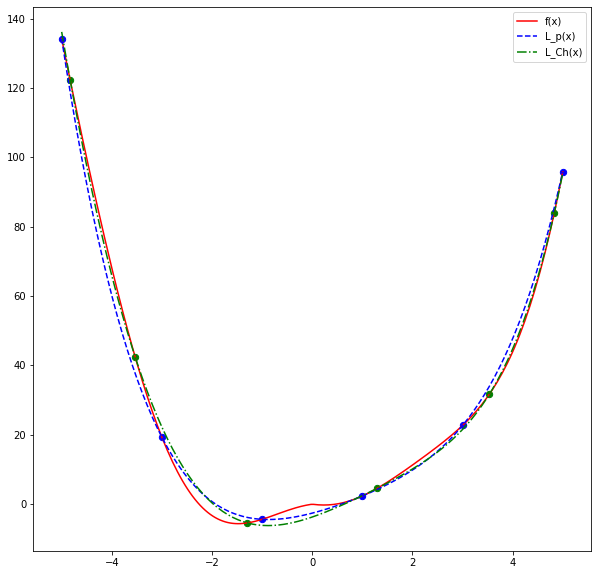

In [16]:
x=np.linspace(-a,a,num=200)
X=np.linspace(-a,a, num=n)
X_Ch=Ch(n,a)
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, [h(_) for _ in x],'r-', label = 'f(x)')
plt.plot(x, L2(x,X), 'b--', label = 'L_p(x)')
plt.plot(x, L2(x,X_Ch), 'g-.', label='L_Ch(x)')
plt.scatter(X, L2(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, L2(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

# TASK 3 (интерполяционный многочлен Эрмита)

In [17]:
def f_1(x):
    return (2*x + 4*np.cos(x))

In [18]:
def f_2(x):
    return (2-4*np.sin(x))

In [19]:
F=[f,f_1]

In [20]:
def DividedDifference(X, df, m):
    n=len(X)
    dd=np.zeros((n*m, n*m)) # matrix of divided difference
    z=np.zeros(n*m)
    k=0 # row index
    for i in range(n):
        for j in range(m):
            k=i*m+j
            z[k]=X[i]
            dd[k,0]=df[i,0] #float("{0:.3f}".format(df[i,0]))
            for l in range(1,k+1):
                if (dd[k,l-1]==dd[k-1,l-1]) and (z[k]==z[k-l]):
                    dd[k,l]=df[i, l] / math.factorial(l)
                else:
                    dd[k,l]=(dd[k, l - 1] - dd[k - 1, l - 1])/(z[k]-z[k-l])             
    return dd

In [21]:
def Hermite(x,X):
    m=len(F)
    n=len(X)  # n data points, m derivatives
    # derivative matrix
    matrix=np.zeros((n,m)) 
    for i in range(n):
        for j in range(m):
            matrix[i,j]=F[j](X[i])
    dd=DividedDifference(X,matrix,m)
    P=0
    u=1
    for i in range(n):
        for j in range(0,m):
            l=i*m+j # index of the coefficient 
            P+=dd[l,l]*u  
            u*=(x-X[i])
    return P

In [22]:
X=np.linspace(-a,a, num=3)
x=np.linspace(-a,a,num=200)
X_Ch=Ch(3,a)

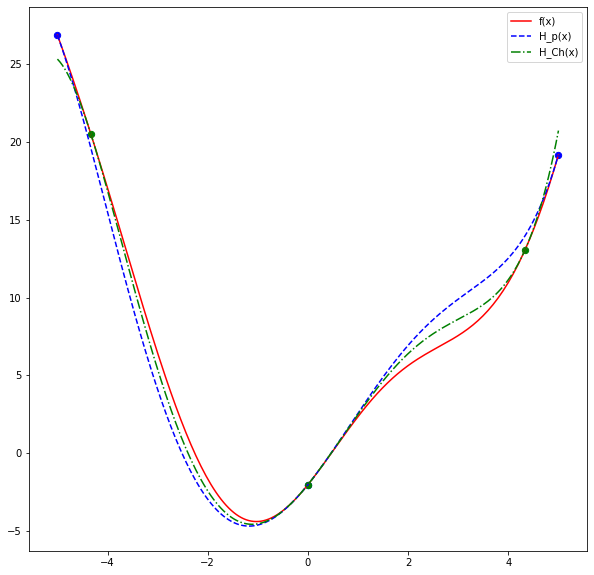

In [23]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.plot(x, Hermite(x,X), 'b--', label = 'H_p(x)')
plt.plot(x, Hermite(x,X_Ch), 'g-.', label='H_Ch(x)')
plt.scatter(X, Hermite(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, Hermite(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

In [24]:
def E3(x,X):
    max=0
    for i in x:
        diff=abs(f(i)-Hermite(i,X))
        if diff>max:
            max=diff
    return max 

In [25]:
def Hermite_E_derivative(x,X):
    h=0.0001
    max=0
    for i in x:
        H_der=(Hermite(i+h,X)-Hermite(i-h,X))/(2*h)
        diff=abs(f_1(i)-H_der)
        if diff>max:
            max=diff
    return max

In [26]:
N=np.arange(3,6)
print('N\t|    E(H_p)\t|    E_der(H_p)\t|    E(H_Ch)\t|  E_der(H_Ch)  |')
print('-'*73)
for i in N:
    print(i,'\t|', end=' ')
    X=np.linspace(-a,a, num=i)
    print(float("{0:.10f}".format(E3(x,X))),'\t| ', end='')
    print(float("{0:.10f}".format(Hermite_E_derivative(x,X))),'\t| ', end='')
    X_Ch=Ch(i,a)
    print(float("{0:.10f}".format(E3(x,X_Ch))),'\t| ', end='')
    print(float("{0:.10f}".format(Hermite_E_derivative(x,X_Ch))),'\t|')

N	|    E(H_p)	|    E_der(H_p)	|    E(H_Ch)	|  E_der(H_Ch)  |
-------------------------------------------------------------------------
3 	| 2.3618185434 	| 2.0224329956 	| 1.5430974186 	| 5.63055367 	|
4 	| 0.3303292833 	| 0.4502281335 	| 0.1658903131 	| 1.0791028908 	|
5 	| 0.0309967295 	| 0.0597304693 	| 0.0107580236 	| 0.1090234616 	|


### Сравнение с точностью полиномов Лагранжа по тем же количествам узлов

In [27]:
def L_E_derivative(x,X):
    h=0.0001
    max=0
    for i in x:
        L_der=(L1(i+h,X)-L1(i-h,X))/(2*h)
        diff=abs(f_1(i)-L_der)
        if diff>max:
            max=diff
    return max

In [28]:
N=np.arange(3,6)
print('N\t|    E(H_p)\t|    E(L_p)\t|    E(H_Ch)\t|  E(L_Ch)\t|')
print('-'*73)
for i in N:
    print(i,'\t|', end=' ')
    X=np.linspace(-a,a, num=i)
    print(float("{0:.10f}".format(E3(x,X))),'\t| ', end='')
    print(float("{0:.10f}".format(E1(x,X))),'\t| ', end='')
    X_Ch=Ch(i,a)
    print(float("{0:.10f}".format(E3(x,X_Ch))),'\t| ', end='')
    print(float("{0:.10f}".format(E1(x,X_Ch))),'\t|')

N	|    E(H_p)	|    E(L_p)	|    E(H_Ch)	|  E(L_Ch)	|
-------------------------------------------------------------------------
3 	| 2.3618185434 	| 5.2780153202 	| 1.5430974186 	| 5.4384735145 	|
4 	| 0.3303292833 	| 5.2341572284 	| 0.1658903131 	| 3.497611217 	|
5 	| 0.0309967295 	| 3.2769838835 	| 0.0107580236 	| 2.8171642454 	|


In [29]:
print('N\t|  E_der(H_p)\t|  E_der(L_p)\t|  E_der(H_Ch)\t|  E_der(L_Ch)\t|')
print('-'*73)
for i in N:
    print(i,'\t|', end=' ')
    X=np.linspace(-a,a, num=i)
    print(float("{0:.10f}".format(Hermite_E_derivative(x,X))),'\t| ', end='')
    print(float("{0:.10f}".format(L_E_derivative(x,X))),'\t| ', end='')
    X_Ch=Ch(i,a)
    print(float("{0:.10f}".format(Hermite_E_derivative(x,X_Ch))),'\t| ', end='')
    print(float("{0:.10f}".format(L_E_derivative(x,X_Ch))),'\t|')

N	|  E_der(H_p)	|  E_der(L_p)	|  E_der(H_Ch)	|  E_der(L_Ch)	|
-------------------------------------------------------------------------
3 	| 2.0224329956 	| 4.7658768918 	| 5.63055367 	| 4.8558238796 	|
4 	| 0.4502281335 	| 9.0030548293 	| 1.0791028908 	| 10.5909275531 	|
5 	| 0.0597304693 	| 6.50097443 	| 0.1090234616 	| 6.1522145701 	|


In [30]:
X=np.linspace(-a,a, num=5)
x=np.linspace(-a,a,num=200)

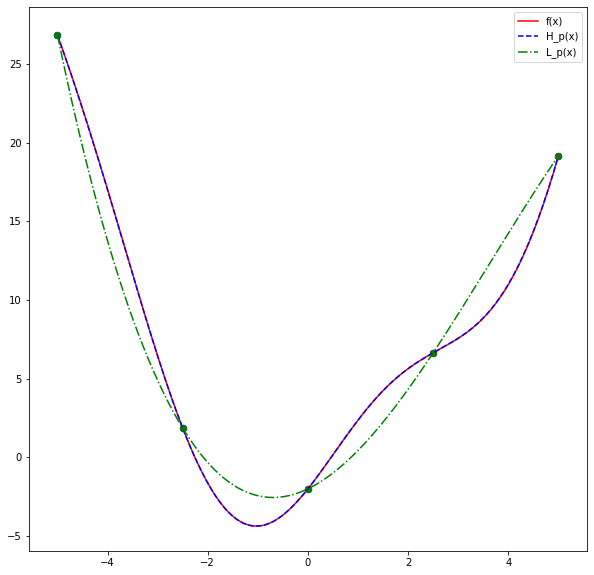

In [31]:
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.plot(x, Hermite(x,X), 'b--', label = 'H_p(x)')
plt.plot(x, L1(x,X), 'g-.', label='L_p(x)')
plt.scatter(X, Hermite(X,X), color='blue', s=40, marker='o')
plt.scatter(X, L1(X,X), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

### Сравнение с точностью полиномов Лагранжа тех же степеней

In [32]:
N=np.arange(3,6)
print('deg\t|    E(H_p)\t|    E(L_p)\t|    E(H_Ch)\t|  E(L_Ch)\t|')
print('-'*73)
for i in N:
    print(i*2-1,'\t|', end=' ')
    X=np.linspace(-a,a, num=i)
    print(float("{0:.10f}".format(E3(x,X))),'\t| ', end='')
    X=np.linspace(-a,a, num=i*2-1)
    print(float("{0:.10f}".format(E1(x,X))),'\t| ', end='')
    X_Ch=Ch(i,a)
    print(float("{0:.10f}".format(E3(x,X_Ch))),'\t| ', end='')
    X_Ch=Ch(i*2-1,a)
    print(float("{0:.10f}".format(E1(x,X_Ch))),'\t|')

deg	|    E(H_p)	|    E(L_p)	|    E(H_Ch)	|  E(L_Ch)	|
-------------------------------------------------------------------------
5 	| 2.3618185434 	| 3.2769838835 	| 1.5430974186 	| 2.8171642454 	|
7 	| 0.3303292833 	| 1.1450457045 	| 0.1658903131 	| 0.5102202809 	|
9 	| 0.0309967295 	| 0.2132564056 	| 0.0107580236 	| 0.0496081556 	|


In [33]:
print('deg\t|  E_der(H_p)\t|  E_der(L_p)\t|  E_der(H_Ch)\t|  E_der(L_Ch)\t|')
print('-'*73)
for i in N:
    print(i*2-1,'\t|', end=' ')
    X=np.linspace(-a,a, num=i)
    print(float("{0:.10f}".format(Hermite_E_derivative(x,X))),'\t| ', end='')
    X=np.linspace(-a,a, num=i*2-1)
    print(float("{0:.10f}".format(L_E_derivative(x,X))),'\t| ', end='')
    X_Ch=Ch(i,a)
    print(float("{0:.10f}".format(Hermite_E_derivative(x,X_Ch))),'\t| ', end='')
    X_Ch=Ch(i*2-1,a)
    print(float("{0:.10f}".format(L_E_derivative(x,X_Ch))),'\t|')

deg	|  E_der(H_p)	|  E_der(L_p)	|  E_der(H_Ch)	|  E_der(L_Ch)	|
-------------------------------------------------------------------------
5 	| 2.0224329956 	| 6.50097443 	| 5.63055367 	| 6.1522145701 	|
7 	| 0.4502281335 	| 4.7644608112 	| 1.0791028908 	| 3.3174950917 	|
9 	| 0.0597304693 	| 1.349329898 	| 0.1090234616 	| 0.6245225138 	|


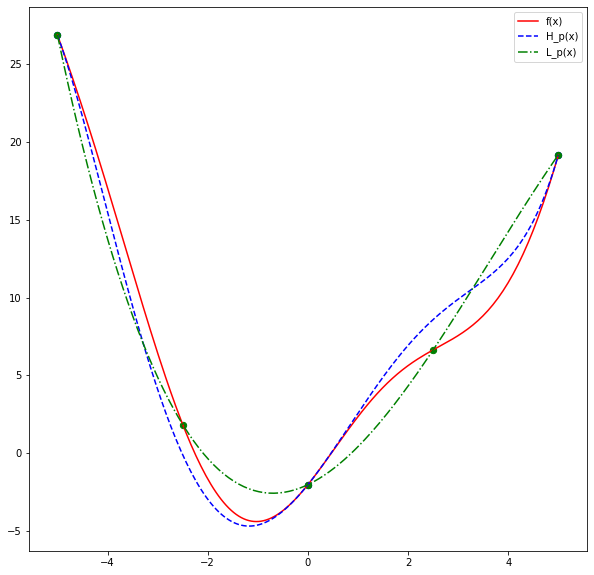

In [34]:
x=np.linspace(-a,a,num=200)
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
X=np.linspace(-a,a, num=3)
plt.plot(x, Hermite(x,X), 'b--', label = 'H_p(x)')
plt.scatter(X, Hermite(X,X), color='blue', s=40, marker='o')
X=np.linspace(-a,a, num=5)
plt.plot(x, L1(x,X), 'g-.', label='L_p(x)')
plt.scatter(X, L1(X,X), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

# TASK 4

In [35]:
F=[f,f_1, f_2]

In [36]:
def Hermite_E_derivative2(x,X):
    h=0.0001
    max=0
    for i in x:
        H_der=(Hermite(i+h,X)+Hermite(i-h,X)-2*Hermite(i,X))/(h**2)
        diff=abs(f_2(i)-H_der)
        if diff>max:
            max=diff
    return max

In [37]:
print('   E(H_p)\t|  E_der(H_p)\t|  E_der2(H_p)\t|   E(H_Ch)\t|  E_der(H_Ch)\t|  E_der2(H_Ch) |')
print('-'*97)
X=np.linspace(-a,a, num=3)
print(float("{0:.10f}".format(E3(x,X))),'\t| ', end='')
print(float("{0:.10f}".format(Hermite_E_derivative(x,X))),'\t| ', end='')
print(float("{0:.10f}".format(Hermite_E_derivative2(x,X))),'\t| ', end='')
X_Ch=Ch(3,a)
print(float("{0:.10f}".format(E3(x,X_Ch))),'\t| ', end='')
print(float("{0:.10f}".format(Hermite_E_derivative(x,X_Ch))),'\t| ', end='')
print(float("{0:.10f}".format(Hermite_E_derivative2(x,X_Ch))),'\t|')

   E(H_p)	|  E_der(H_p)	|  E_der2(H_p)	|   E(H_Ch)	|  E_der(H_Ch)	|  E_der2(H_Ch) |
-------------------------------------------------------------------------------------------------
0.5591611589 	| 0.4419595008 	| 0.6149617697 	| 0.1875092812 	| 0.8228887521 	| 3.2998723929 	|


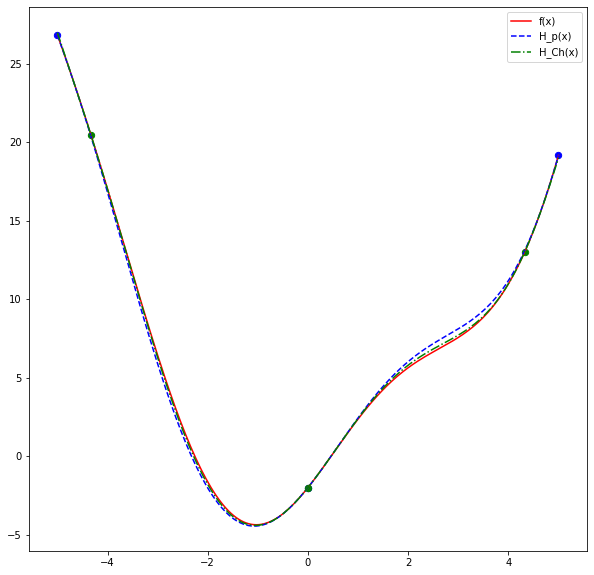

In [38]:
X=np.linspace(-a,a, num=3)
x=np.linspace(-a,a,num=200)
X_Ch=Ch(3,a)
plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.plot(x, Hermite(x,X), 'b--', label = 'H_p(x)')
plt.plot(x, Hermite(x,X_Ch), 'g-.', label='H_Ch(x)')
plt.scatter(X, Hermite(X,X), color='blue', s=40, marker='o')
plt.scatter(X_Ch, Hermite(X_Ch,X_Ch), color='green', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

# TASK 5 (построение сплайнов)

In [39]:
def S10(x,X):
    for i in range(len(X)):
        if x==X[i]:
            return f(X[i])
        elif (x>X[i]) and (x<X[i+1]):
            return f(X[i])*(X[i+1]-x)/(X[i+1]-X[i])+f(X[i+1])*(x-X[i])/(X[i+1]-X[i])

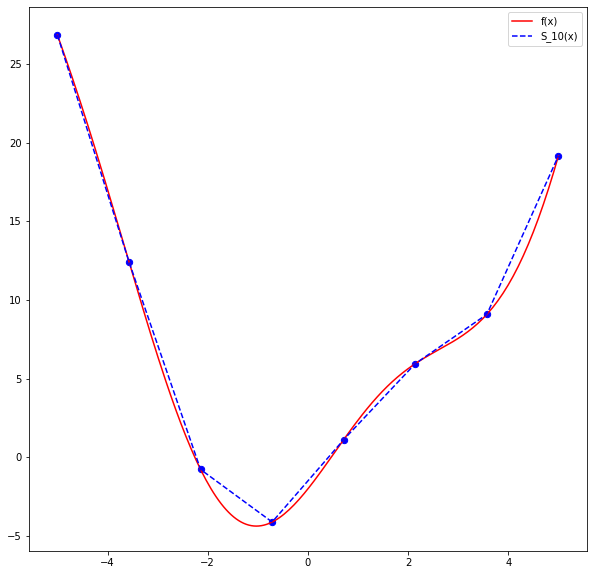

In [40]:
n=8 # колво узлов
x=np.linspace(-a,a,num=200)
X=np.linspace(-a,a, num=n)

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.plot(x, [S10(_,X) for _ in x], 'b--', label = 'S_10(x)')
plt.scatter(X, [S10(_,X) for _ in X], color='blue', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

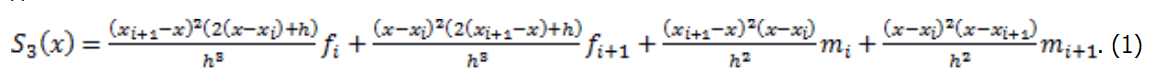

In [41]:
def S31(x,X):
     # Если у нас имеются значения  производной в узлах , то полагаем , mi=fi' i=0,1,…,N.
    for i in range(len(X)):
        if x==X[i]:
            return f(X[i])
        elif (x>X[i]) and (x<X[i+1]):
            h=X[i+1]-X[i]
            return f(X[i])*(X[i+1]-x)**2*(2*(x-X[i])+h)/h**3 + f(X[i+1])*(x-X[i])**2*(2*(X[i+1]-x)+h)/h**3 \
                     + f_1(X[i])*(X[i+1]-x)**2*(x-X[i])/h**2 + f_1(X[i+1])*(x-X[i])**2*(x-X[i+1])/h**2

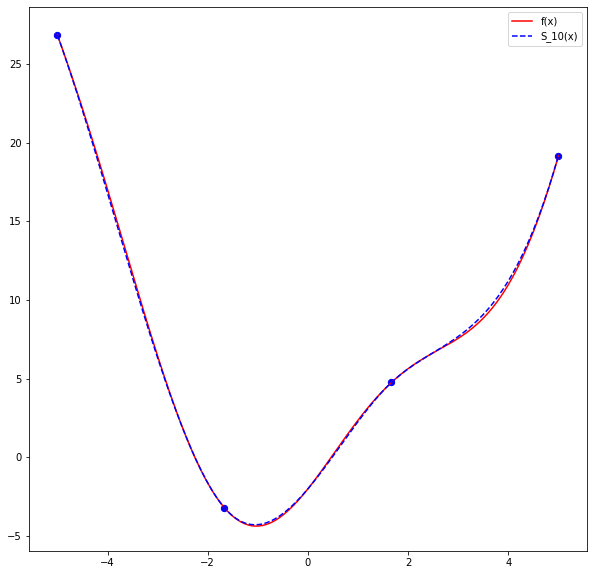

In [42]:
n=4 # колво узлов
x=np.linspace(-a,a,num=200)
X=np.linspace(-a,a, num=n)

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.plot(x, [S31(_,X) for _ in x], 'b--', label = 'S_10(x)')
plt.scatter(X, [S31(_,X) for _ in X], color='blue', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

In [43]:
def LU(u,n):  # LU разложение
    l = np.zeros((n, n), dtype=float)
    p = np.eye(n)
    q = np.eye(n)
    for i in range(n):
        u1 = u[i:, i:]
        a = u1.argmax()
        col = a % (n - i)
        line = a // (n - i)
        p1 = np.eye(n, dtype=int)
        p1[i, i] = 0
        p1[line + i, line + i] = 0
        p1[line + i, i] = 1
        p1[i, line + i] = 1
        q1 = np.eye(n, dtype=int)
        q1[i, i] = 0
        q1[col + i, col + i] = 0
        q1[i, col + i] = 1
        q1[col + i, i] = 1
        p = p1.dot(p)
        q = q.dot(q1)
        u = (p1.dot(u)).dot(q1)
    for i in range(n):
        l[i, i] = 1
        for j in range(i + 1, n):
            l[j, i] = u[j, i] / u[i, i]
            u[j] -= l[j, i] * u[i]
    return l, u, p, q

In [44]:
# решение системы с помощью LU разложения
def AxB(l, u, b, n):
    y = np.zeros(n, dtype=float)  # Ly=b
    y[0] = b[0]
    for i in range(1, n):
        y[i] = b[i]
        for k in range(i):
            y[i] -= l[i, k] * y[k]
    nul_lines_U = 0  # проверка на совместность
    nul_y = 0
    for i in reversed(range(n)):
        flag = True
        for j in range(n):
            if abs(u[i, j]) > 1e-10:
                flag = False
        if flag:
            nul_lines_U += 1
        if abs(y[i]) < 1e-10:
            nul_y += 1
    if nul_lines_U > nul_y:
        print('Система не совместна')
    else:
        rang = n - nul_lines_U
        x = np.zeros(n, dtype=float)  # Ux=y
        filled_x = []
        for i in range(n):
            filled_x.append(0)
        for i in reversed(range(rang)):
            p = i
            unknown = 0
            for k in range(p, n):
                if filled_x[k] == 0 and abs(u[i, k]) > 1e-10:
                    unknown += 1
                    if unknown == 1:
                        p = k
            if unknown > 1:
                for k in range(p + 1, n):
                    if filled_x[k] == 0 and abs(u[i, k]) > 1e-10:
                        x[k] = 0
                        filled_x[k] = 1
            x[p] = y[i]
            k = i
            while k != n - 1:
                k += 1
                if k != p and abs(u[i, k]) > 1e-10:
                    x[p] -= u[i, k] * x[k]
            x[p] = x[p] / u[i, p]
            filled_x[p] = 1
        for i in range(n):
            if filled_x[i] == 0:
                x[i] = 0
        return x
    return 0

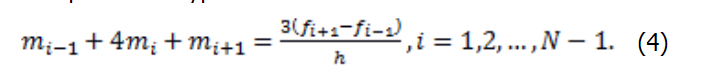

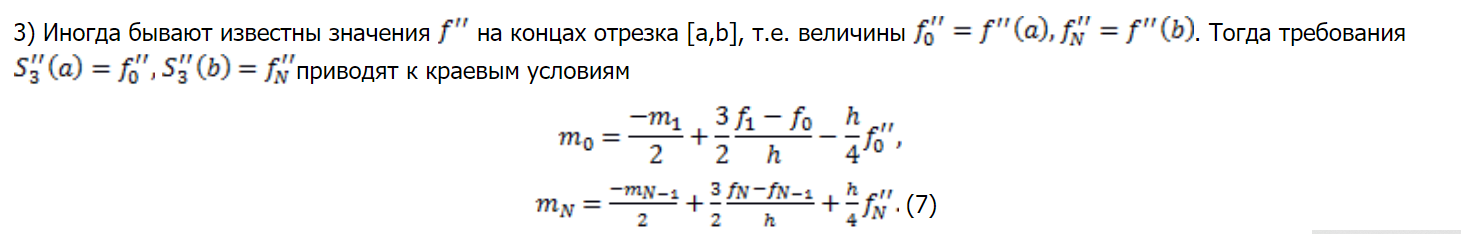

In [45]:
def S32_natural(x,X):
    # решаем систему для коэффициентов mi вида A*M=H*F
    n=len(X)
    F=np.zeros((n,1))
    for i in range(n):
        F[i]=f(X[i])
    H=np.zeros((n,n))
    h=X[1]-X[0]
    A=np.zeros((n,n))
    A[0,0]=1
    A[n-1,n-1]=1
    for i in range(1,n-1):
        H[i,i-1]=-3/h
        H[i,i+1]=3/h
        A[i,i]=4
        A[i,i+1]=1
        A[i,i-1]=1
    b = H @ F
    l, u, p, q = LU(A,n)
    M = AxB(l, u, p.dot(b), n)  
    M = q @ M
    M[0]=-M[1]/2 + 3/2*(f(X[1])-f(X[0]))/h
    M[n-1]=-M[n-1]/2 + 3/2*(f(X[n-1])-f(X[n-2]))/h
    # построение полинома
    for i in range(n):
        if x==X[i]:
            return f(X[i])
        elif (x>=X[i]) and (x<X[i+1]):
            h=X[i+1]-X[i]
            return f(X[i])*(X[i+1]-x)**2*(2*(x-X[i])+h)/h**3 + f(X[i+1])*(x-X[i])**2*(2*(X[i+1]-x)+h)/h**3 \
                     + M[i]*(X[i+1]-x)**2*(x-X[i])/h**2 + M[i+1]*(x-X[i])**2*(x-X[i+1])/h**2

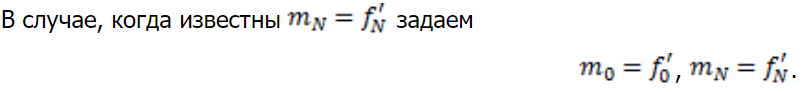

In [46]:
def S32_der(x,X):
    # решаем систему для коэффициентов mi вида A*M=H*F
    n=len(X)
    F=np.zeros((n,1))
    for i in range(n):
        F[i]=f(X[i])
    H=np.zeros((n,n))
    h=X[1]-X[0]
    A=np.zeros((n,n))
    A[0,0]=1
    A[n-1,n-1]=1
    for i in range(1,n-1):
        H[i,i-1]=-3/h
        H[i,i+1]=3/h
        A[i,i]=4
        A[i,i+1]=1
        A[i,i-1]=1
    b = H @ F
    b[0]=f_1(X[0])
    b[n-1]=f_1(X[n-1])
    l, u, p, q = LU(A,n)
    M = AxB(l, u, p.dot(b), n)  
    M = q @ M
    # построение полинома
    for i in range(n):
        if x==X[i]:
            return f(X[i])
        elif (x>=X[i]) and (x<X[i+1]):
            h=X[i+1]-X[i]
            return f(X[i])*(X[i+1]-x)**2*(2*(x-X[i])+h)/h**3 + f(X[i+1])*(x-X[i])**2*(2*(X[i+1]-x)+h)/h**3 \
                     + M[i]*(X[i+1]-x)**2*(x-X[i])/h**2 + M[i+1]*(x-X[i])**2*(x-X[i+1])/h**2

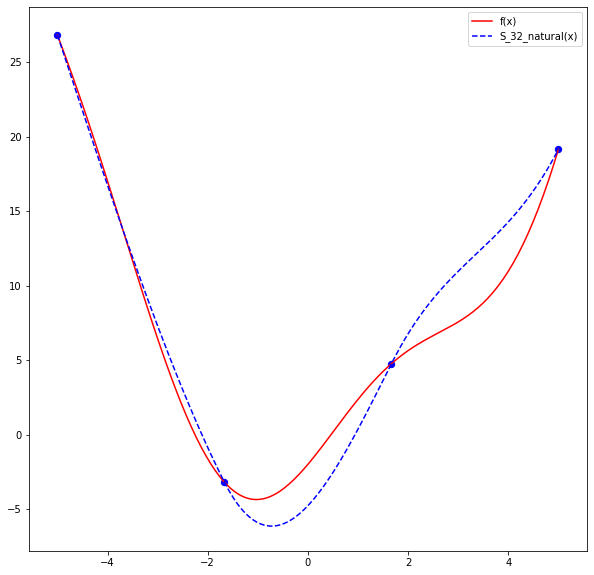

In [47]:
n=4 # колво узлов
x=np.linspace(-a,a,num=200)
X=np.linspace(-a,a, num=n)

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.plot(x, [S32_natural(_,X) for _ in x], 'b--', label = 'S_32_natural(x)')
plt.scatter(X, [S32_natural(_,X) for _ in X], color='blue', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

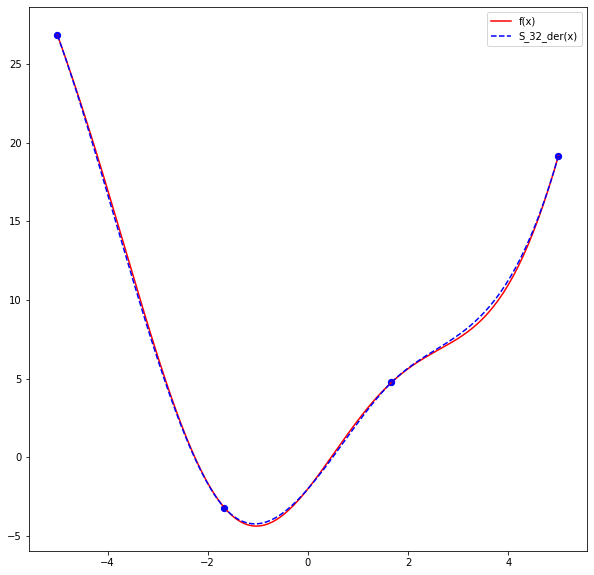

In [48]:
n=4 # колво узлов
x=np.linspace(-a,a,num=200)
X=np.linspace(-a,a, num=n)

plt.rcParams["figure.figsize"] = (10,10)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.plot(x, [S32_der(_,X) for _ in x], 'b--', label = 'S_32_der(x)')
plt.scatter(X, [S32_natural(_,X) for _ in X], color='blue', s=40, marker='o')
# plt.axis('equal')
plt.legend()
plt.show()

### Сравнение всех сплайнов

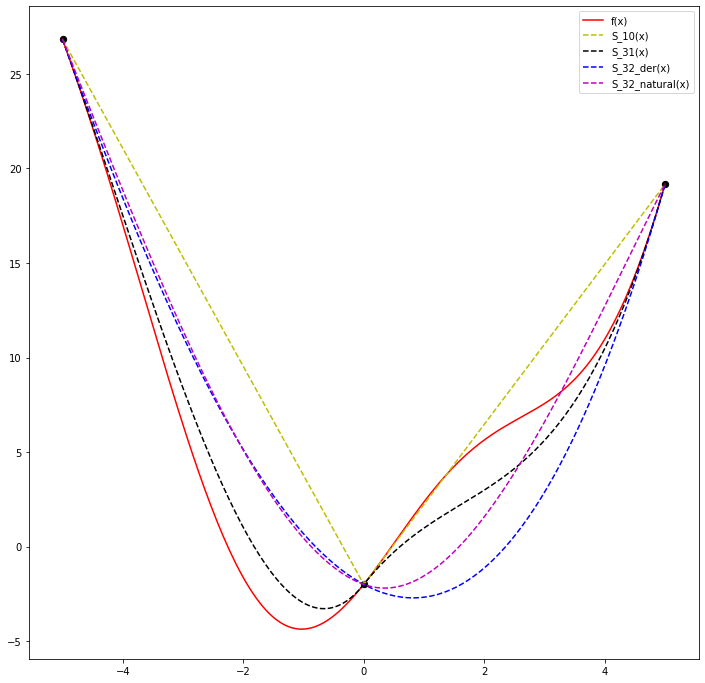

In [49]:
n=3 # колво узлов
x=np.linspace(-a,a,num=200)
X=np.linspace(-a,a, num=n)

plt.rcParams["figure.figsize"] = (12,12)
fig = plt.figure()
plt.plot(x, f(x),'r-', label = 'f(x)')
plt.scatter(X, [S10(_,X) for _ in X], color='black', s=40, marker='o')
plt.plot(x, [S10(_,X) for _ in x], 'y--', label = 'S_10(x)')
plt.plot(x, [S31(_,X) for _ in x], 'k--', label = 'S_31(x)')
plt.plot(x, [S32_der(_,X) for _ in x], 'b--', label = 'S_32_der(x)')
plt.plot(x, [S32_natural(_,X) for _ in x], 'm--', label = 'S_32_natural(x)')
# plt.axis('equal')
plt.legend()
plt.show()